In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/icmrtestinglabswithcoords1/datasets_624680_1113799_ICMRTestingLabsWithCoords.csv


In [2]:
df = pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [3]:
print("Size/Shape of the dataset: ",df.shape)
print("Checking for null values:\n",df.isnull().sum())
print("Checking Data-type of each column:\n",df.dtypes)

#df['Time']

Size/Shape of the dataset:  (3855, 9)
Checking for null values:
 Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64
Checking Data-type of each column:
 Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object


In [4]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.head()
#df.drop(['Date'],axis=1)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
#pd.set_option('display.max_rows', None)
Analysis = df.groupby(["Date"]).agg({"Confirmed":'sum',"Cured":'sum',"Deaths":'sum'})
Analysis["Days Since"] = Analysis.index-Analysis.index.min()
Analysis

,Confirmed,Cured,Deaths,Days Since
Date,,,,
2020-01-30,1,0,0,0 days
2020-01-31,1,0,0,1 days
2020-02-01,2,0,0,2 days
2020-02-02,3,0,0,3 days
2020-02-03,3,0,0,4 days
...,...,...,...,...
2020-07-03,625544,379892,18213,155 days
2020-07-04,648315,394227,18655,156 days
2020-07-05,673165,409083,19268,157 days


In [6]:
print("Total no of confirmed cases till date :",Analysis['Confirmed'].iloc[-1])
print("Total no of deaths till date :",Analysis['Deaths'].iloc[-1])
print("Total no of cured cases till date :",Analysis['Cured'].iloc[-1])
print("Total no of active cases till date :",Analysis['Confirmed'].iloc[-1]-Analysis['Deaths'].iloc[-1]-Analysis['Cured'].iloc[-1])
print("Total no of confirmed cases per day :",np.round((Analysis['Confirmed'].iloc[-1])/(Analysis.shape[0])))
print("Total no of death cases per day :",np.round((Analysis['Deaths'].iloc[-1])/(Analysis.shape[0])))
print("Total no of cured cases per day :",np.round((Analysis['Cured'].iloc[-1])/(Analysis.shape[0])))
print("Total no of confirmed cases per hour :",np.round((Analysis['Confirmed'].iloc[-1])/((Analysis.shape[0])*24)))
print("Total no of death cases per hour :",np.round((Analysis['Deaths'].iloc[-1])/((Analysis.shape[0])*24)))
print("Total no of cured cases per hour :",np.round((Analysis['Cured'].iloc[-1])/((Analysis.shape[0])*24)))




Total no of confirmed cases till date : 719665
Total no of deaths till date : 20160
Total no of cured cases till date : 439948
Total no of active cases till date : 259557
Total no of confirmed cases per day : 4498.0
Total no of death cases per day : 126.0
Total no of cured cases per day : 2750.0
Total no of confirmed cases per hour : 187.0
Total no of death cases per hour : 5.0
Total no of cured cases per hour : 115.0


(array([737456., 737485., 737516., 737546., 737577., 737607.]),
 <a list of 6 Text major ticklabel objects>)

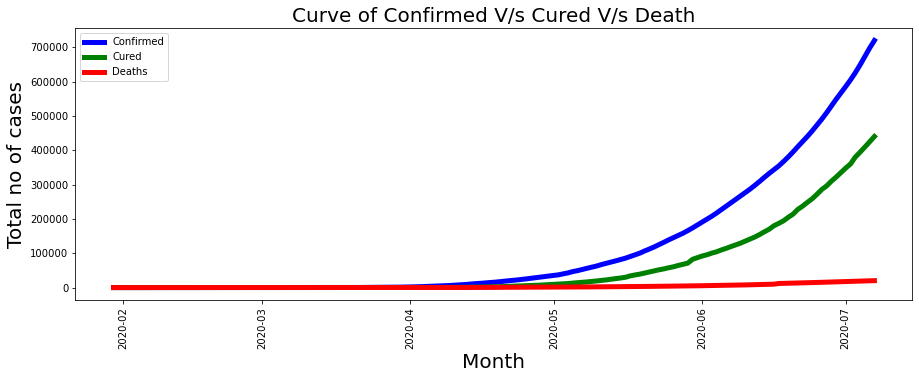

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

#Date = Analysis.index.date
#print(Date)
#Total_confirmed = Analysis['Confirmed']
#Total_deaths    = Analysis['Deaths']
#Total_cured     = Analysis['Cured']

#fig,axs = plt.subplots(2,2,figsize=(20,15))
plt.figure(figsize=(15,5))
#plt.plot(Date,Total_confirmed)

plt.plot(Analysis.index.date,Analysis["Confirmed"],linewidth='5',color='b')
plt.plot(Analysis.index.date,Analysis["Cured"],linewidth='5',color='g')
plt.plot(Analysis.index.date,Analysis["Deaths"],linewidth='5',color='r')

plt.legend(['Confirmed','Cured','Deaths'])
plt.title("Curve of Confirmed V/s Cured V/s Death",fontsize=20)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Total no of cases",fontsize=20)
plt.xticks(rotation=90)

Mortality and Recovery rate across India

Text(0, 0.5, 'Total count')

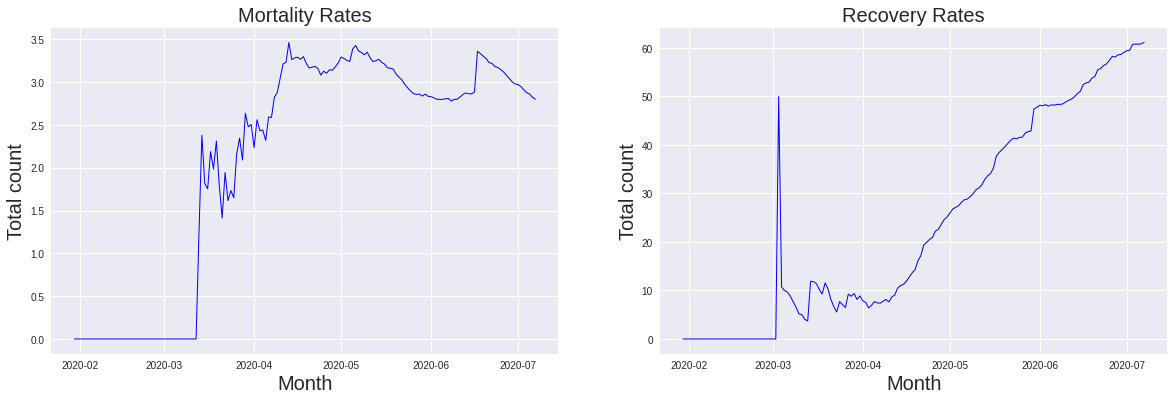

In [8]:
Analysis["Mortality Rate"]=(Analysis["Deaths"]/Analysis["Confirmed"])*100
Analysis["Recovery Rate"]=(Analysis["Cured"]/Analysis["Confirmed"])*100

plt.style.use('seaborn')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
ax1.plot(Analysis["Mortality Rate"],linewidth=1,color='b')
ax1.set_title('Mortality Rates',fontsize=20)
ax1.set_xlabel('Month',fontsize=20)
ax1.set_ylabel('Total count',fontsize=20)

ax2.plot(Analysis["Recovery Rate"],linewidth=1,color='b')
ax2.set_title('Recovery Rates',fontsize=20)
ax2.set_xlabel('Month',fontsize=20)
ax2.set_ylabel('Total count',fontsize=20)
#print(Analysis["Mortality Rate"])


In [9]:
Analysis.head()

,Confirmed,Cured,Deaths,Days Since,Mortality Rate,Recovery Rate
Date,,,,,,
2020-01-30,1,0,0,0 days,0.0,0.0
2020-01-31,1,0,0,1 days,0.0,0.0
2020-02-01,2,0,0,2 days,0.0,0.0
2020-02-02,3,0,0,3 days,0.0,0.0
2020-02-03,3,0,0,4 days,0.0,0.0


In [10]:
import plotly.express as px
fig = px.bar( df.loc[(df['State/UnionTerritory']=='Maharashtra')&(df.Date >= '2020-03-01')].sort_values('Confirmed',ascending = False),x='Date', y='Confirmed',
             color="Confirmed", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Confirmed COVID-19 cases in Maharashtra')
fig.show()

In [11]:
import plotly.express as px
fig = px.bar( df.loc[(df['State/UnionTerritory']=='Delhi')&(df.Date >= '2020-03-01')].sort_values('Confirmed',ascending = False),x='Date', y='Confirmed',
             color="Confirmed",color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases in Delhi')
fig.show()

In [12]:
import plotly.express as px
fig = px.bar( df.loc[(df['State/UnionTerritory']=='Tamil Nadu')&(df.Date >= '2020-03-01')].sort_values('Confirmed',ascending = False),x='Date', y='Confirmed',
             color="Confirmed",color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed COVID-19 cases in Tamil Nadu')
fig.show()

In [13]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
3850,3851,2020-07-07,8:00 AM,Tripura,-,-,1219,1,1680
3851,3852,2020-07-07,8:00 AM,Uttarakhand,-,-,2586,42,3161
3852,3853,2020-07-07,8:00 AM,Uttar Pradesh,-,-,19109,809,28636
3853,3854,2020-07-07,8:00 AM,West Bengal,-,-,15235,779,22987


Representation of statewise pandemic effect

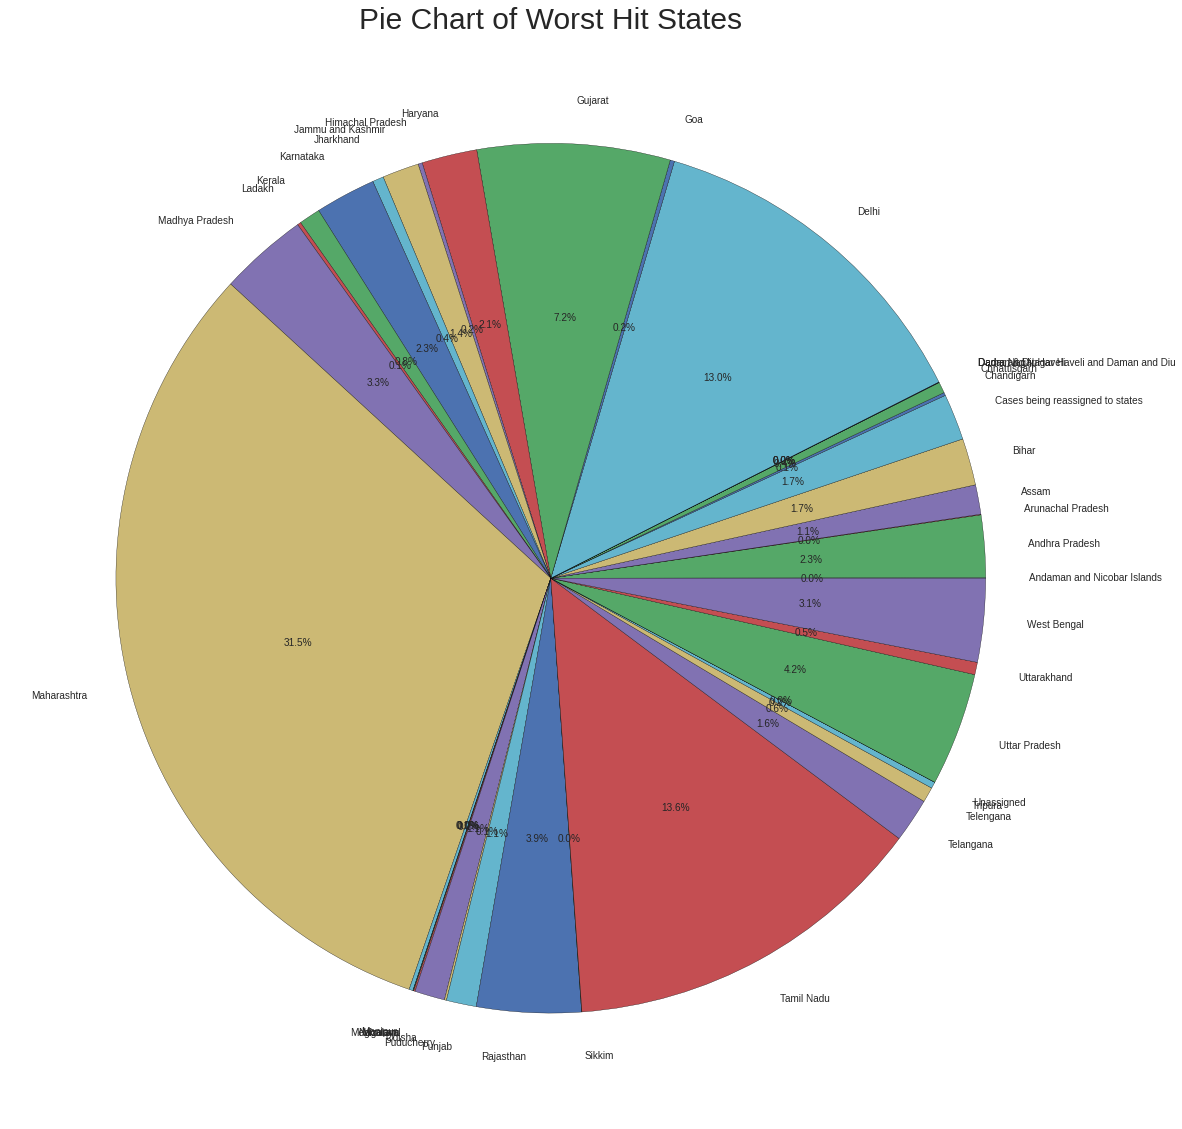

In [14]:
pd.set_option('display.max_rows', None)
Wrst_Afctd_ST= df.groupby(["State/UnionTerritory"]).agg({"Confirmed":'sum'})
Wrst_Afctd_ST

States    = Wrst_Afctd_ST.index
Confirmed = list(Wrst_Afctd_ST['Confirmed'])
#print(Confirmed)
#print(States)
#Wrst_Afctd_ST
plt.figure(figsize=(20,20))
plt.title("Pie Chart of Worst Hit States",fontsize=30)
plt.pie(Confirmed,labels=States,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()

Testing count done statewise

In [15]:

ST_testing = pd.read_csv('/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv')


States = (list(ST_testing['State'].unique()))
States
Total_Testing = []

for item in States:
    Total_Testing.append(ST_testing[ST_testing['State']==item]['TotalSamples'].max())

##state_testing =    
#print(Total_Testing)

india_testing = pd.DataFrame(list(zip(States,Total_Testing)),columns=['States','Total_Testing'])

india_testing

,States,Total_Testing
0,Andaman and Nicobar Islands,17095.0
1,Andhra Pradesh,1033852.0
2,Arunachal Pradesh,27645.0
3,Assam,471221.0
4,Bihar,264109.0
5,Chandigarh,8528.0
6,Chhattisgarh,185399.0
7,Dadra and Nagar Haveli and Daman and Diu,33995.0
8,Delhi,657383.0
9,Goa,77033.0


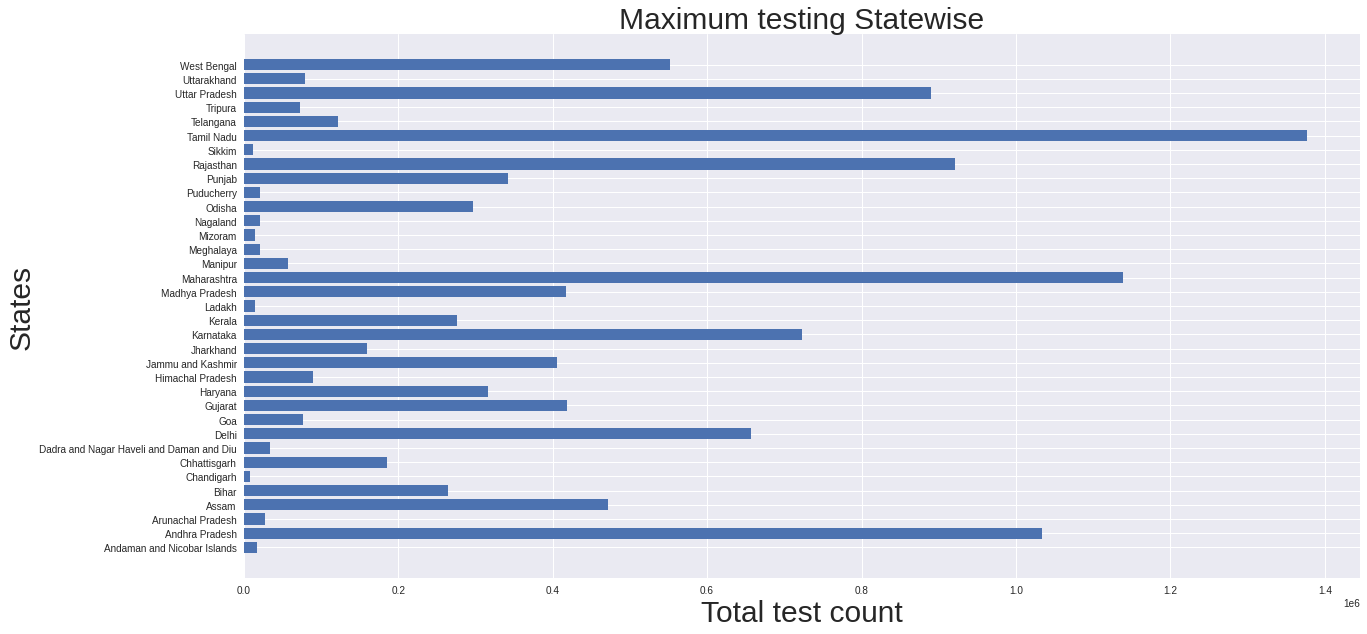

In [16]:
plt.figure(figsize=(20,10))
plt.barh(States,Total_Testing)
plt.xlabel("Total test count",fontsize=30)
plt.ylabel("States",fontsize=30)
plt.title("Maximum testing Statewise",fontsize=30)

plt.show()

Calculate the mortality and Recovery rates statewise based on confirmed cases

In [17]:
State = list(df['State/UnionTerritory'].unique())
#print(State)

Confirmed = []
Deaths    = []
Cured = []
for item in State:
    Confirmed.append(df[df['State/UnionTerritory']==item]['Confirmed'].max())
    Deaths.append(df[df['State/UnionTerritory']==item]['Deaths'].max())
    Cured.append(df[df['State/UnionTerritory']==item]['Cured'].max())
    
#print(Confirmed)

Statewise = pd.DataFrame(list(zip(State,Confirmed,Deaths,Cured)),columns=['State','Confirmed','Deaths','Cured'])
Statewise['Mortality'] = (Statewise['Deaths']/Statewise['Confirmed'])*100
Statewise['Recovery'] = (Statewise['Cured']/Statewise['Confirmed'])*100
Statewise

,State,Confirmed,Deaths,Cured,Mortality,Recovery
0,Kerala,5622,27,3341,0.480256,59.427250
1,Telengana,4111,156,1817,3.794697,44.198492
2,Delhi,100823,3115,72088,3.089573,71.499559
3,Rajasthan,20688,461,16278,2.228345,78.683295
4,Uttar Pradesh,28636,809,19109,2.825115,66.730689
5,Haryana,17504,276,13335,1.576782,76.182587
6,Ladakh,1005,1,836,0.099502,83.184080
7,Tamil Nadu,114978,1571,66571,1.366348,57.898902
8,Karnataka,25317,401,10527,1.583916,41.580756
9,Maharashtra,211987,9026,115262,4.257808,54.372202


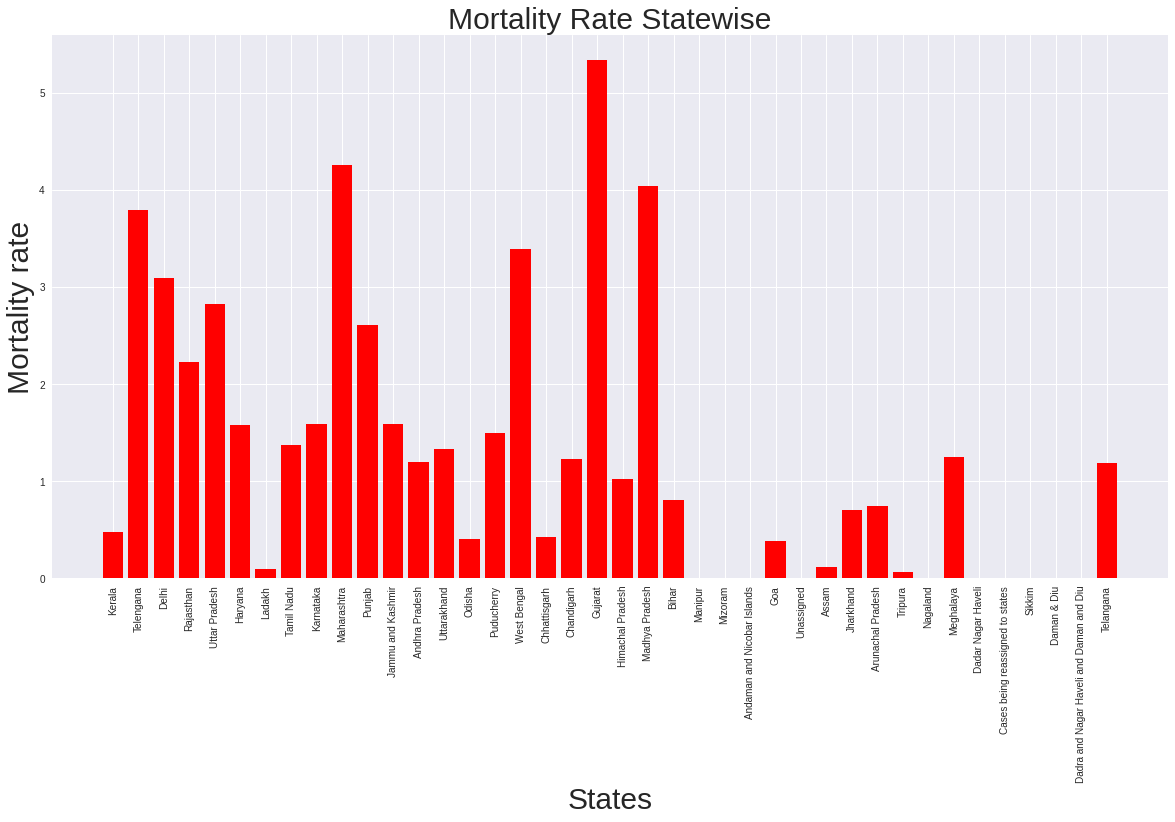

In [18]:
mortality = Statewise['Mortality']
plt.figure(figsize=(20,10))
plt.bar(State,mortality,color='r')
plt.xlabel("States",fontsize=30)
plt.ylabel("Mortality rate",fontsize=30)
plt.title("Mortality Rate Statewise",fontsize=30)
plt.xticks(rotation=90)
plt.show()

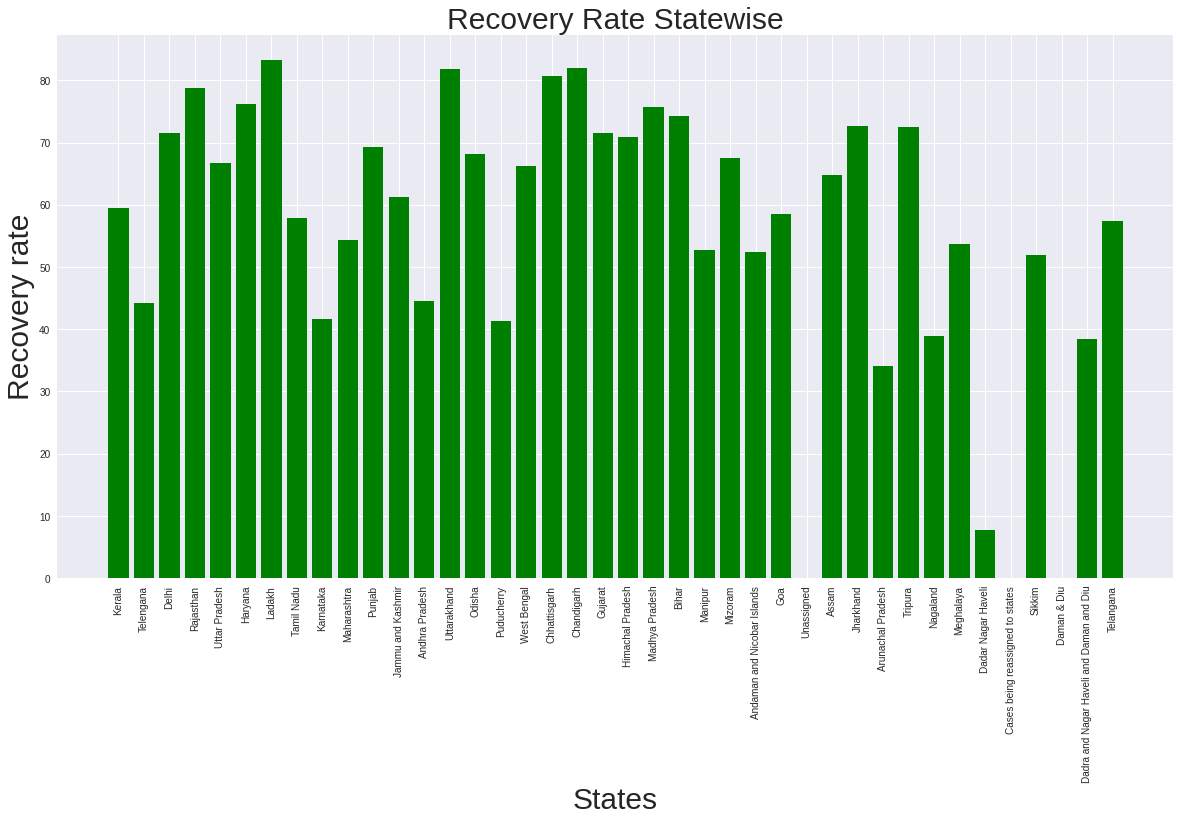

In [19]:
recovery = Statewise['Recovery']
plt.figure(figsize=(20,10))
plt.bar(State,recovery,color='g')
plt.xlabel("States",fontsize=30)
plt.ylabel("Recovery rate",fontsize=30)
plt.title("Recovery Rate Statewise",fontsize=30)
plt.xticks(rotation=90)
plt.show()

Testing labs spread across India

In [20]:
df_lab = pd.read_csv('../input/icmrtestinglabswithcoords1/datasets_624680_1113799_ICMRTestingLabsWithCoords.csv')
fig = px.scatter_mapbox(df_lab,
                        lat="latitude",
                        lon="longitude",
                        mapbox_style='stamen-watercolor',
                        hover_name='lab',
                        hover_data=['city','state','pincode'],
                        zoom=2.5,
                        size_max=15,
                        title= 'COVID19 Testing Labs in India')
fig.show()

Pandaemic impact Age group wise

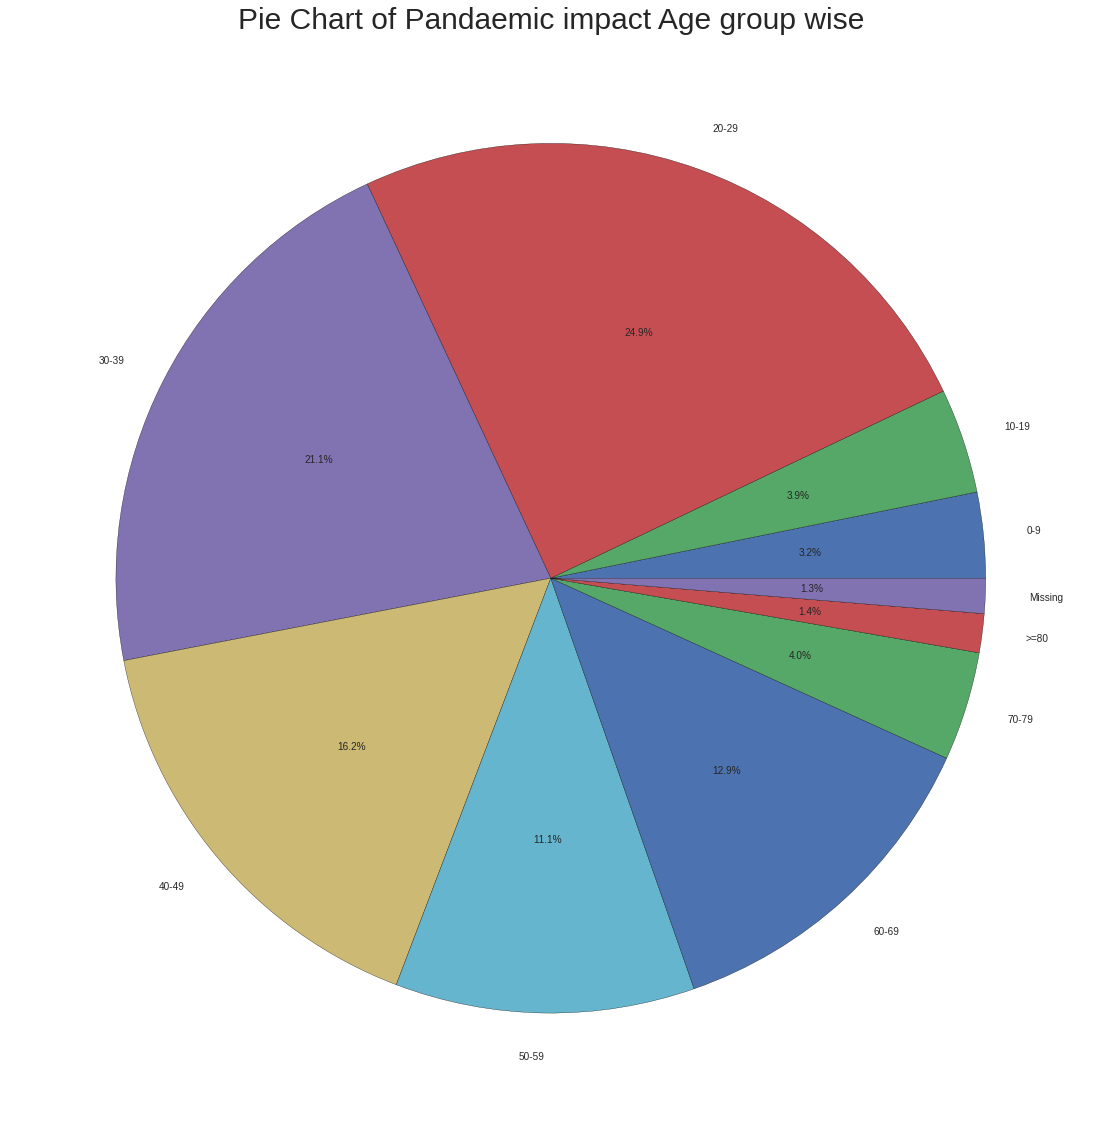

In [21]:
AgeDF = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
AgeDF

AgeGroup = AgeDF['AgeGroup']
slice    = AgeDF['TotalCases']

plt.figure(figsize=(20,20))
plt.title("Pie Chart of Pandaemic impact Age group wise",fontsize=30)
plt.pie(slice,labels=AgeGroup,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.show()
